<a href="https://colab.research.google.com/github/XIAOFEIIIII/FaceAlign/blob/main/addition_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [ ]:
<div style='background-color: #FFC300; '> <a id='p1.3'></a>

## Property Data eda
    
### In the following section, we analyzed the correlationship of the indicators in the property data set 
    
 - Assesment Value :
    - AV_TOTAL is the addition of AV_LAND and AV_BLDG
    - GROSS_TAX is ‘total assessed value multiplied by the tax rate’, tax rate for each type of properties were different
    - AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX, have shown strong correlations (>0.9) with each other
    
 - Time
    - Built year of properties were around 1920-1925
    - Last Remold year of properties were around 1995-2010
    - Hard to tell a correlationship between year built/remold and the assesment value
    
 - Type
    - Residential is the main type of properties on 85% of the streets
    - Commercial is the main type of properties on only 4% of the streets
    
 - Coclusion
     - Careful using Gross_tax and total value in further regression model


    
[▲ Return to contents](#Contents)
<div>

SyntaxError: ignored

In [ ]:
lt_density_df = pd.read_csv("street_light/LightDensityOnStreet.csv")

In [ ]:
lt_density_df.describe()

,STREET_ID,SHAPElen,cnt,density
count,3504.000000,3504.000000,3504.000000,3504.000000
mean,2660.125856,1185.744065,19.162386,0.016410
std,1559.191257,3191.119849,52.286625,0.016052
min,2.000000,23.793865,1.000000,0.000729
25%,1333.750000,293.841010,3.000000,0.007287
50%,2616.500000,541.709808,7.000000,0.013880
75%,3988.250000,1033.115841,17.000000,0.020432
max,5612.000000,69410.408897,1132.000000,0.472859


In [ ]:
lt_density_df.head()

,STREET_ID,ST_NAME,ST_TYPE,SHAPElen,cnt,density,NAME
0,2,A,ST,4190.728012,65,0.015510,A ST
1,3,Abbot,ST,890.996524,4,0.004489,ABBOT ST
2,4,Abbotsford,ST,754.523518,18,0.023856,ABBOTSFORD ST
3,6,Aberdeen,ST,400.193651,7,0.017492,ABERDEEN ST
4,8,Academy,RD,638.427615,17,0.026628,ACADEMY RD


In [ ]:
lt_density_df_sort = lt_density_df.sort_values(by = 'density',ascending = False).reset_index(drop = True)
lt_density_df_sort.head()

,STREET_ID,ST_NAME,ST_TYPE,SHAPElen,cnt,density,NAME
0,2158,Imrie,RD,61.329048,29,0.472859,IMRIE RD
1,4898,Foster's,WHRF,252.044585,56,0.222183,FOSTER'S WHRF
2,4820,Decher,AVE,74.712462,15,0.200770,DECHER AVE
3,1368,Elizabeth,ST,108.240000,19,0.175536,ELIZABETH ST
4,3653,Rowes,WHRF,477.145144,80,0.167664,ROWES WHRF


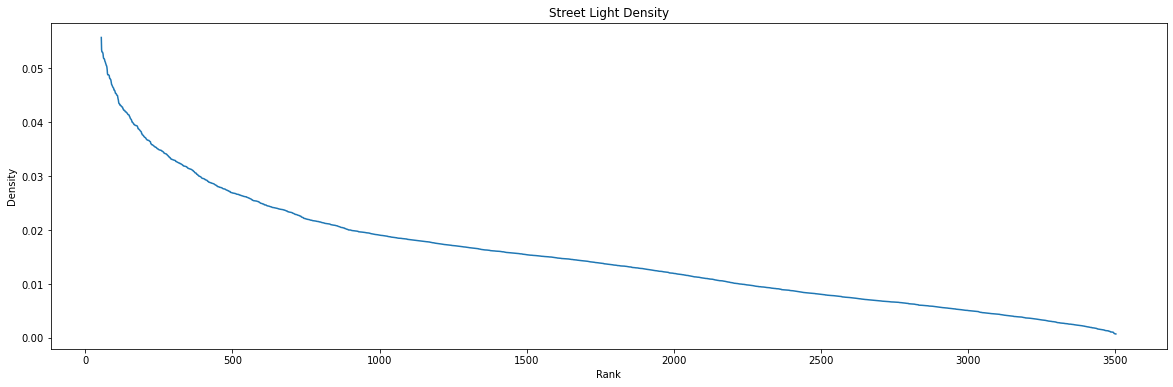

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(lt_density_df_sort.tail(3450)['density'])
ax.set_ylabel('Density')
ax.set_xlabel('Rank')
plt.title('Street Light Density')
plt.show()

In [ ]:
street_df = pd.read_csv("street_df/st_info_mean_df_16.csv")
street_df['BL+LA'] = street_df['AV_BLDG']+street_df['AV_LAND']

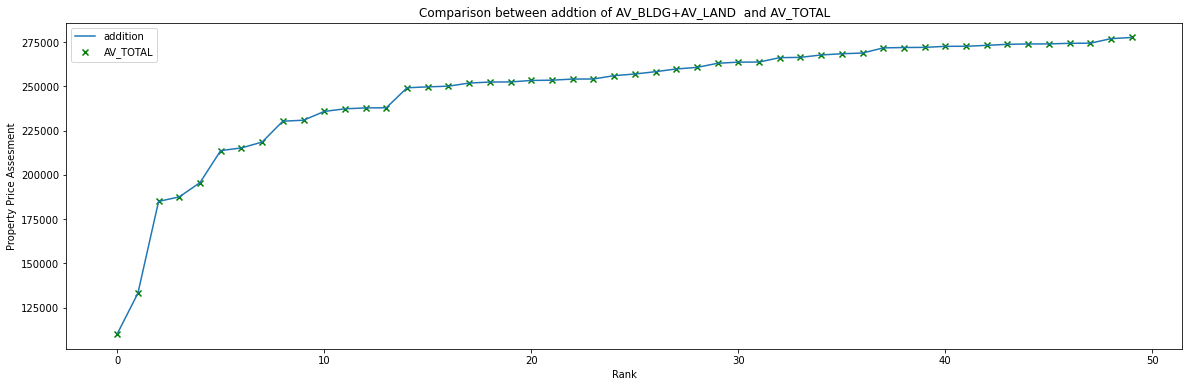

In [ ]:
street_df_cp = street_df.sort_values(by = 'AV_TOTAL').reset_index(drop = True)
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(street_df_cp.head(50).index,street_df_cp.head(50)['AV_TOTAL'],label = 'AV_TOTAL',marker = 'x',color = 'green')
ax.plot(street_df_cp.head(50)['BL+LA'],label = 'addition')
ax.set_ylabel('Property Price Assesment')
ax.set_xlabel('Rank')
plt.title('Comparison between addtion of AV_BLDG+AV_LAND  and AV_TOTAL')
plt.legend()
plt.show()

In [ ]:
street_df_lu = street_df.copy()
street_df_lu['R_'] = street_df_lu['R1']+ street_df_lu['R2']+ street_df_lu['R3']+ street_df_lu['R4']+street_df_lu['A']+street_df_lu['CD']
street_df_lu['C_'] = street_df_lu['C']+ street_df_lu['CC']+ street_df_lu['CL']
street_df_lu['R/C'] = street_df_lu['R_']/street_df_lu['C_']

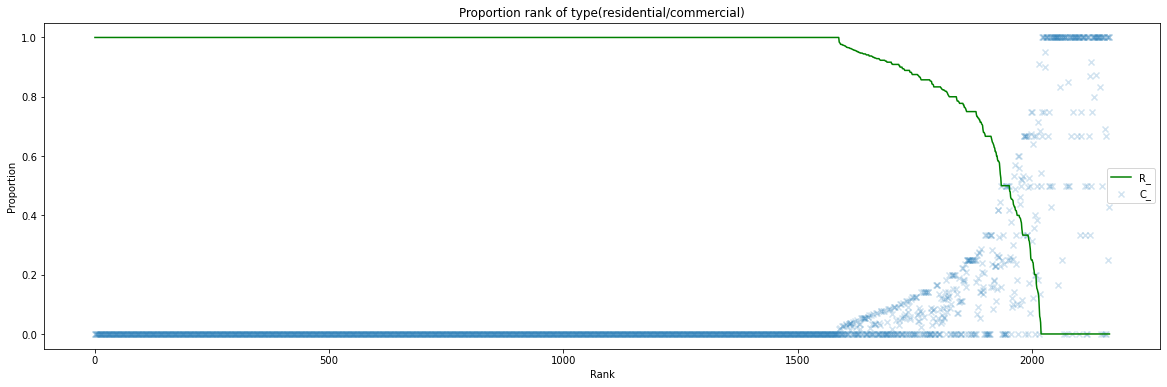

In [ ]:
street_df_lu_sortR = street_df_lu.sort_values(by = 'R_', ascending = False).reset_index(drop = True)
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(street_df_lu_sortR['R_'],label = 'R_',color = 'green')
ax.scatter(street_df_lu_sortR.index,street_df_lu_sortR['C_'],label = 'C_',alpha = 0.2,marker = 'x')
ax.set_ylabel('Proportion')
ax.set_xlabel('Rank')
plt.title('Proportion rank of type(residential/commercial)')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = street_df_lu_sortR[['GROSS_TAX','AV_BLDG','AV_TOTAL','AV_LAND']]
X_scaled = X.copy()
X_scaled[list(X)] = scaler.fit_transform(X)

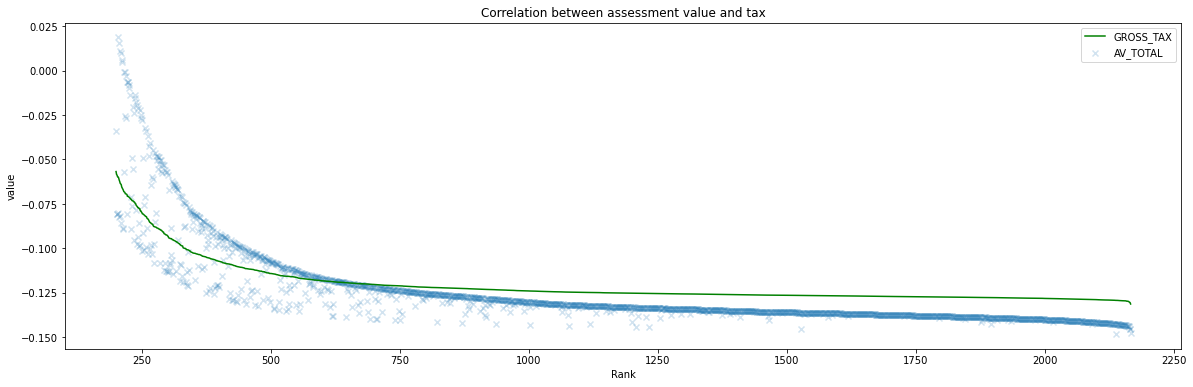

The mse for all type between tax and building value is  0.0248


In [ ]:
X_scaled_sort = X_scaled.sort_values(by = 'GROSS_TAX', ascending = False).reset_index(drop = True)
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(X_scaled_sort.tail(1967)['GROSS_TAX'],label = 'GROSS_TAX',color = 'green')
ax.scatter(X_scaled_sort.tail(1967).index,X_scaled_sort.tail(1967)['AV_TOTAL'],alpha = 0.2,label = 'AV_TOTAL',marker = 'x')
ax.set_ylabel('value')
ax.set_xlabel('Rank')

plt.title('Correlation between assessment value and tax')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
mse_all = mean_squared_error(X_scaled_sort['GROSS_TAX'],X_scaled_sort['AV_TOTAL'])
print(f'The mse for all type between tax and building value is  {mse_all :.4f}')

In [ ]:
street_df_lu_sortR_R = street_df_lu_sortR[street_df_lu_sortR['R_'] > 0.8 ]
street_df_lu_sortR_C = street_df_lu_sortR[street_df_lu_sortR['C_'] > 0.8 ]

print(f'There are {len(street_df_lu_sortR_R)} streets with 100% type of residential, account for {len(street_df_lu_sortR_R)/2167 :.4f} of all')
print(f'There are {len(street_df_lu_sortR_C)} streets with 100% type of commercial,account for {len(street_df_lu_sortR_C)/2167 :.4f} of all')

There are 1824 streets with 100% type of residential, account for 0.8417 of all
There are 104 streets with 100% type of commercial,account for 0.0480 of all


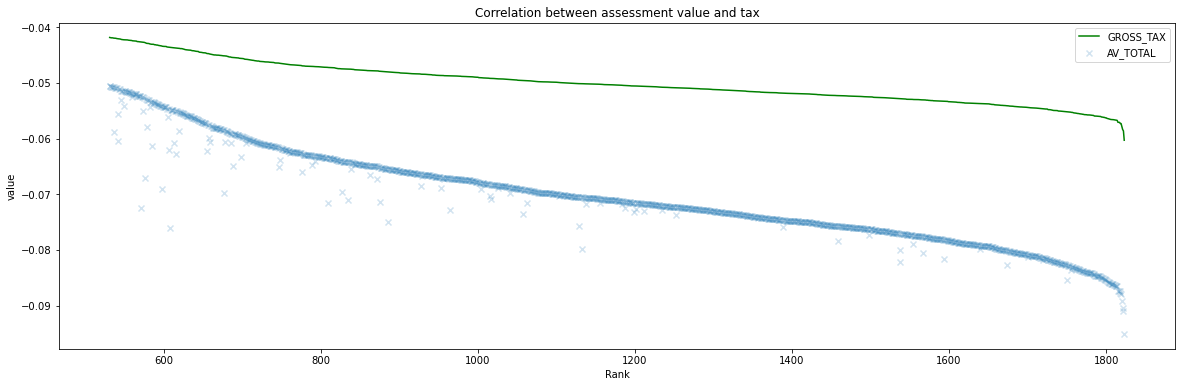

The mse for residential property between tax and building value is  0.0004


In [ ]:
X_R = street_df_lu_sortR_R[['GROSS_TAX','AV_BLDG','AV_TOTAL','AV_LAND']]
X_scaled_R = X_R.copy()
X_scaled_R[list(X_R)] = scaler.fit_transform(X_R)
X_scaled_sort_R = X_scaled_R.sort_values(by = 'GROSS_TAX', ascending = False).reset_index(drop = True)
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(X_scaled_sort_R.tail(1293)['GROSS_TAX'],label = 'GROSS_TAX',color = 'green')
ax.scatter(X_scaled_sort_R.tail(1293).index,X_scaled_sort_R.tail(1293)['AV_TOTAL'],alpha = 0.2,label = 'AV_TOTAL',marker = 'x')
ax.set_ylabel('value')
ax.set_xlabel('Rank')
plt.title('Correlation between assessment value and tax')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
mse_r = mean_squared_error(X_scaled_sort_R['GROSS_TAX'].tail(1293),X_scaled_sort_R['AV_TOTAL'].tail(1293))
print(f'The mse for residential property between tax and building value is  {mse_r :.4f}')

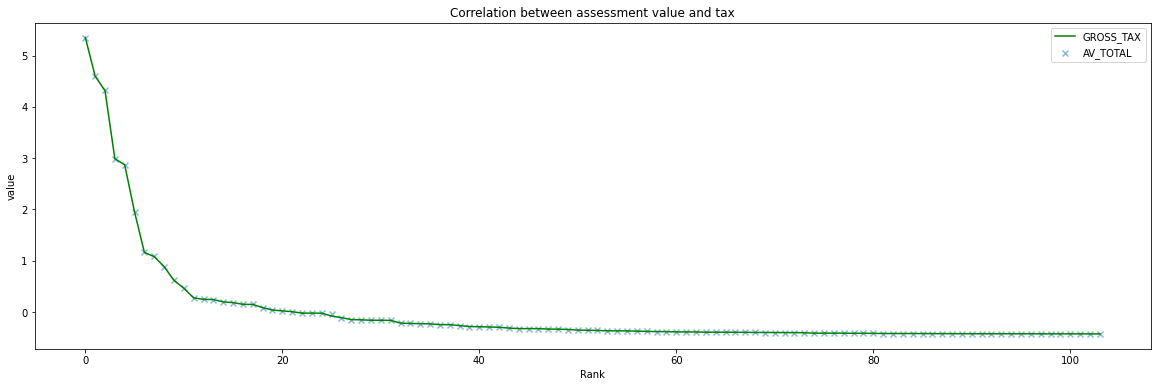

The mse for commercial property between tax and building value is  0.000018


In [ ]:
X_C = street_df_lu_sortR_C[['GROSS_TAX','AV_BLDG','AV_TOTAL','AV_LAND']]
X_scaled_C = X_C.copy()
X_scaled_C[list(X_C)] = scaler.fit_transform(X_C)
X_scaled_sort_C = X_scaled_C.sort_values(by = 'GROSS_TAX', ascending = False).reset_index(drop = True)
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(X_scaled_sort_C['GROSS_TAX'],label = 'GROSS_TAX',color = 'green')
ax.scatter(X_scaled_sort_C.index,X_scaled_sort_C['AV_TOTAL'],alpha = 0.5,label = 'AV_TOTAL',marker = 'x')
ax.set_ylabel('value')
ax.set_xlabel('Rank')
plt.title('Correlation between assessment value and tax')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
mse_C = mean_squared_error(X_scaled_sort_C['GROSS_TAX'],X_scaled_sort_C['AV_TOTAL'])
print(f'The mse for commercial property between tax and building value is  {mse_C :4f}')